In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from iads import visualisation as visual
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [2]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Statistiques

In [3]:
df_avis_up.describe()

,date_published,note
count,176243.000000,176243.000000
mean,2012.129730,7.478046
std,5.012995,2.171968
min,2000.000000,0.000000
25%,2008.000000,6.000000
50%,2012.000000,8.000000
75%,2016.000000,9.300000
max,2023.000000,10.000000


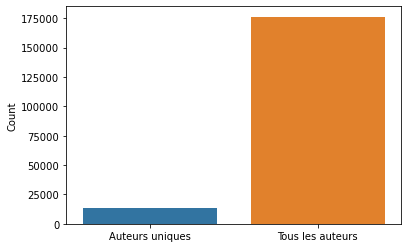

In [4]:
sns.barplot(["Auteurs uniques", "Tous les auteurs"], 
            [len(np.unique(df_avis_up["author"])), len(df_avis_up["author"])])
plt.ylabel("Count")
plt.show()

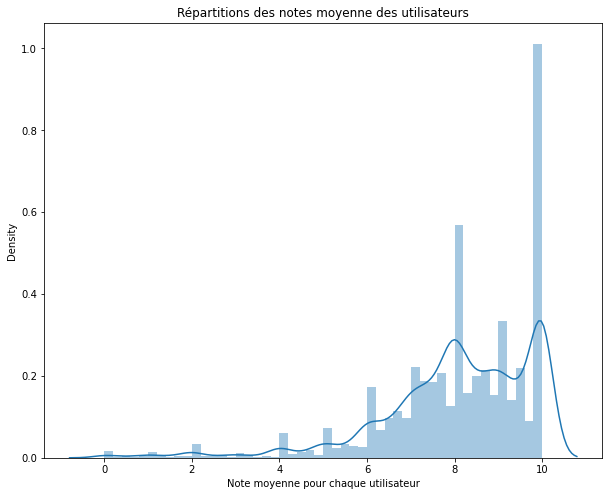

In [5]:
note_g = df_avis_up.groupby("author")["note"].mean()
authors = note_g.keys()
notes = note_g.values

plt.figure(figsize=(10, 8))
sns.distplot(notes).set(title="Répartitions des notes moyenne des utilisateurs")
plt.xlabel("Note moyenne pour chaque utilisateur")
plt.show()

In [6]:
authors, counts = np.unique(df_avis_up["author"], return_counts=True)

In [7]:
index = counts.argsort()[::-1]
counts = counts[index]
authors = authors[index]

- Le nombre d'avis suit une loi de `Zipf`

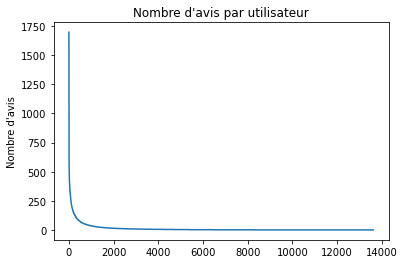

In [8]:
plt.plot(counts)
plt.title("Nombre d'avis par utilisateur")
plt.ylabel("Nombre d'avis")
plt.show()

## Top 10 des utilisateurs : 

In [9]:
top_authors = authors[:10]
top_counts = counts[:10] 

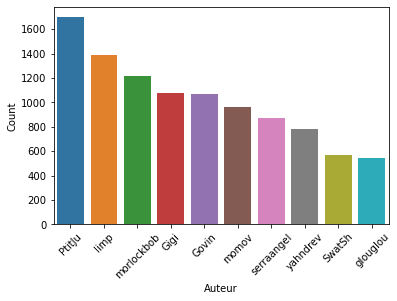

In [10]:
ax = sns.barplot(top_authors, top_counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Count")
plt.show()

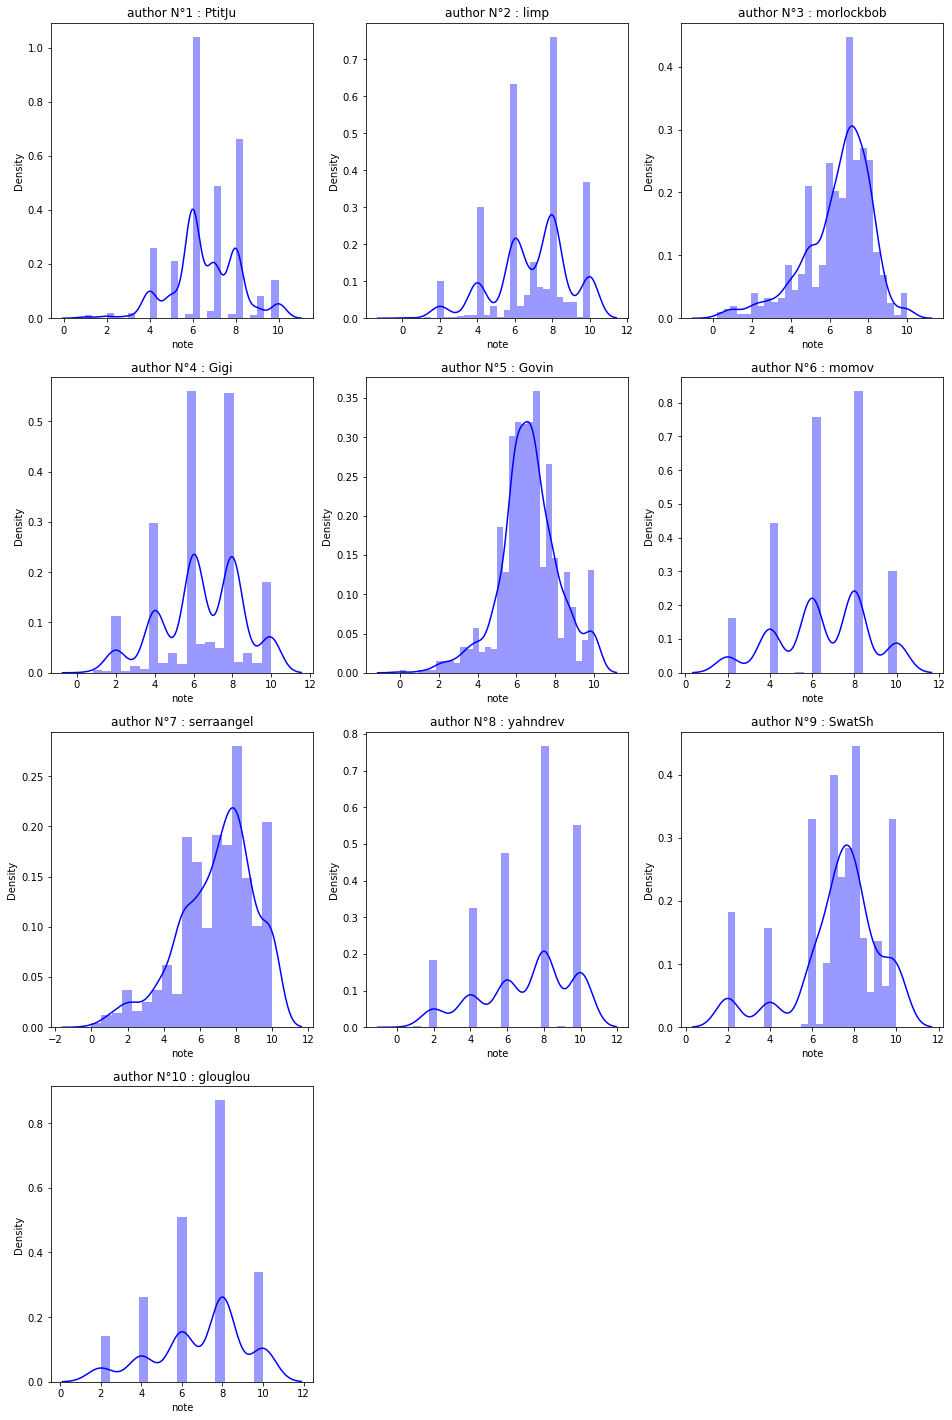

In [11]:
plt.figure(figsize=(16, 25))

i = 1
for aut in top_authors:
    notes = df_avis_up[df_avis_up["author"] == aut]["note"]        
    plt.subplot(4, 3, i)
    sns.distplot(notes, color="blue").set(title=f"author N°{i} : {aut}")
    i += 1

In [12]:
seuil = df_avis_up["note"].median()
seuil

8.0

### Notes positives : 

In [13]:
df_pos = df_avis_up[df_avis_up["note"] >= seuil]

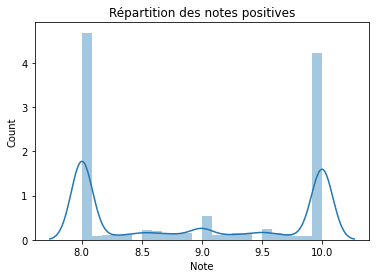

In [14]:
sns.distplot(df_pos["note"])
plt.title("Répartition des notes positives")
plt.xlabel("Note")
plt.ylabel("Count")
plt.show()

In [15]:
pos_auth, pos_counts = np.unique(df_pos["author"], return_counts=True)

index = pos_counts.argsort()[::-1]
pos_counts = pos_counts[index]
pos_auth = pos_auth[index]

In [16]:
print("Nombre d'auteur avec des notes positives :", len(pos_auth))

Nombre d'auteur avec des notes positives : 12149


In [17]:
top_pos_auth = pos_auth[:10]
top_pos_counts = pos_counts[:10] 

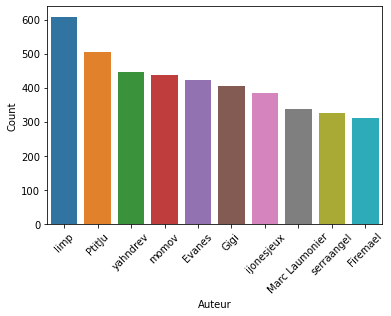

In [18]:
ax = sns.barplot(top_pos_auth, top_pos_counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Count")
plt.show()

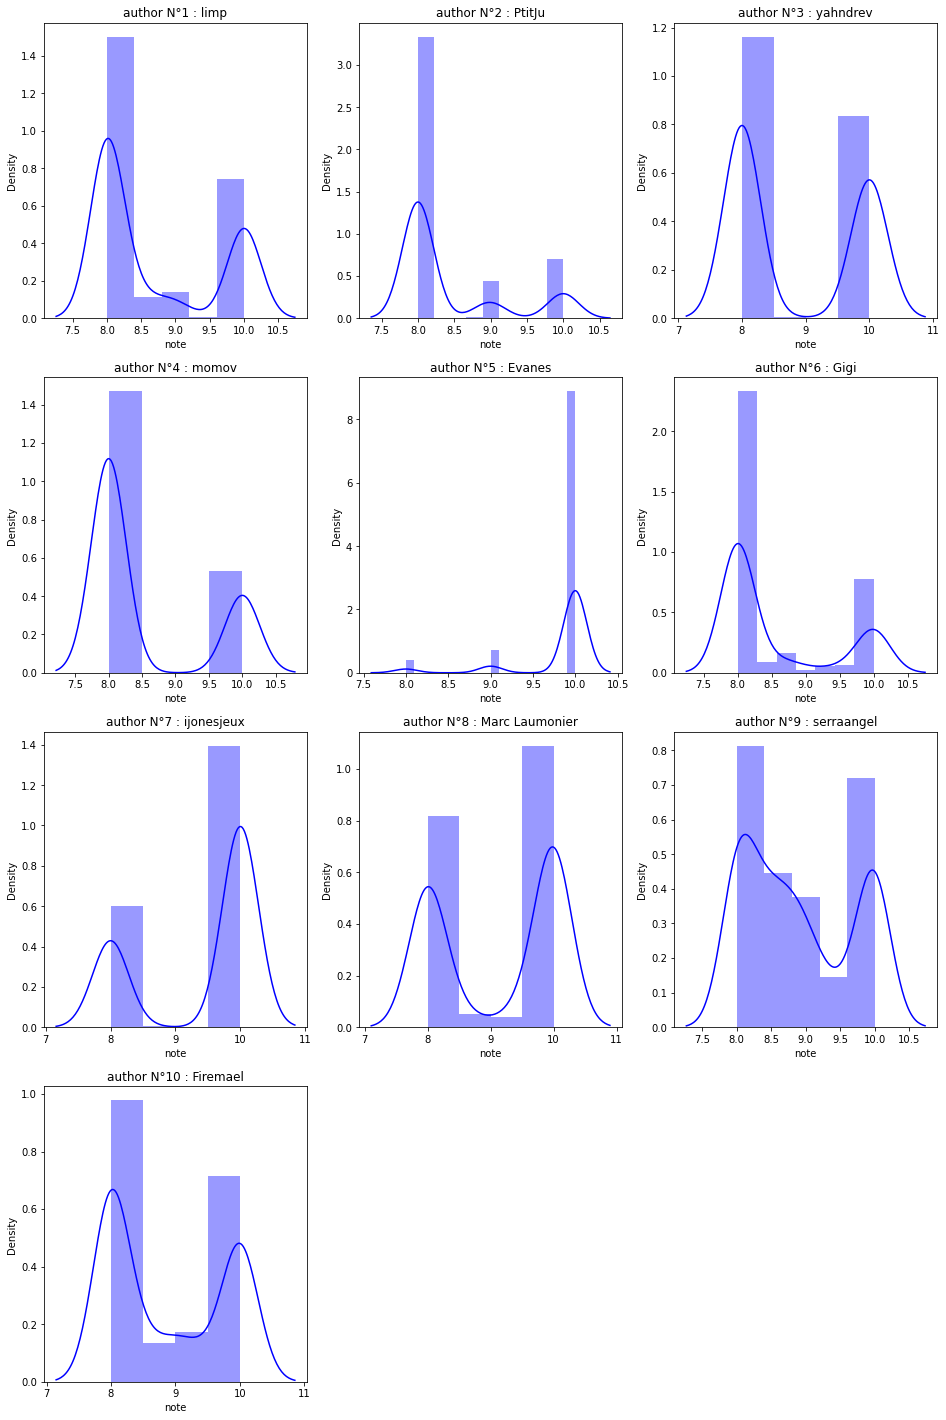

In [19]:
plt.figure(figsize=(16, 25))

i = 1
for aut in top_pos_auth:
    notes = df_pos[df_pos["author"] == aut]["note"]        
    plt.subplot(4, 3, i)
    sns.distplot(notes, color="blue").set(title=f"author N°{i} : {aut}")
    i += 1

### Notes négatives : 

In [20]:
df_neg = df_avis_up[df_avis_up["note"] < seuil]

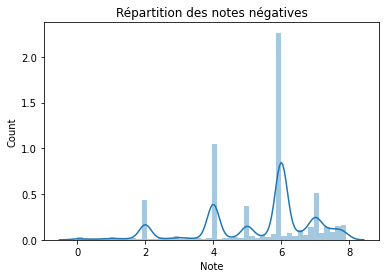

In [21]:
sns.distplot(df_neg["note"])
plt.title("Répartition des notes négatives")
plt.xlabel("Note")
plt.ylabel("Count")
plt.show()

In [22]:
neg_auth, neg_counts = np.unique(df_neg["author"], return_counts=True)

index = neg_counts.argsort()[::-1]
neg_counts = neg_counts[index]
neg_auth = neg_auth[index]

In [23]:
print("Nombre d'auteur avec des notes négatives :", len(neg_auth))

Nombre d'auteur avec des notes négatives : 7264


In [24]:
top_neg_auth = neg_auth[:10]
top_neg_counts = neg_counts[:10] 

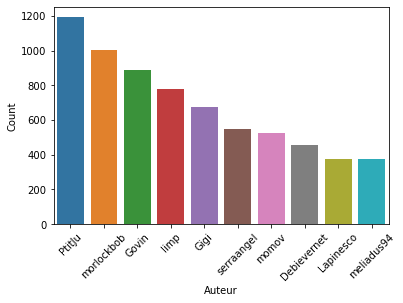

In [25]:
ax = sns.barplot(top_neg_auth, top_neg_counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Count")
plt.show()

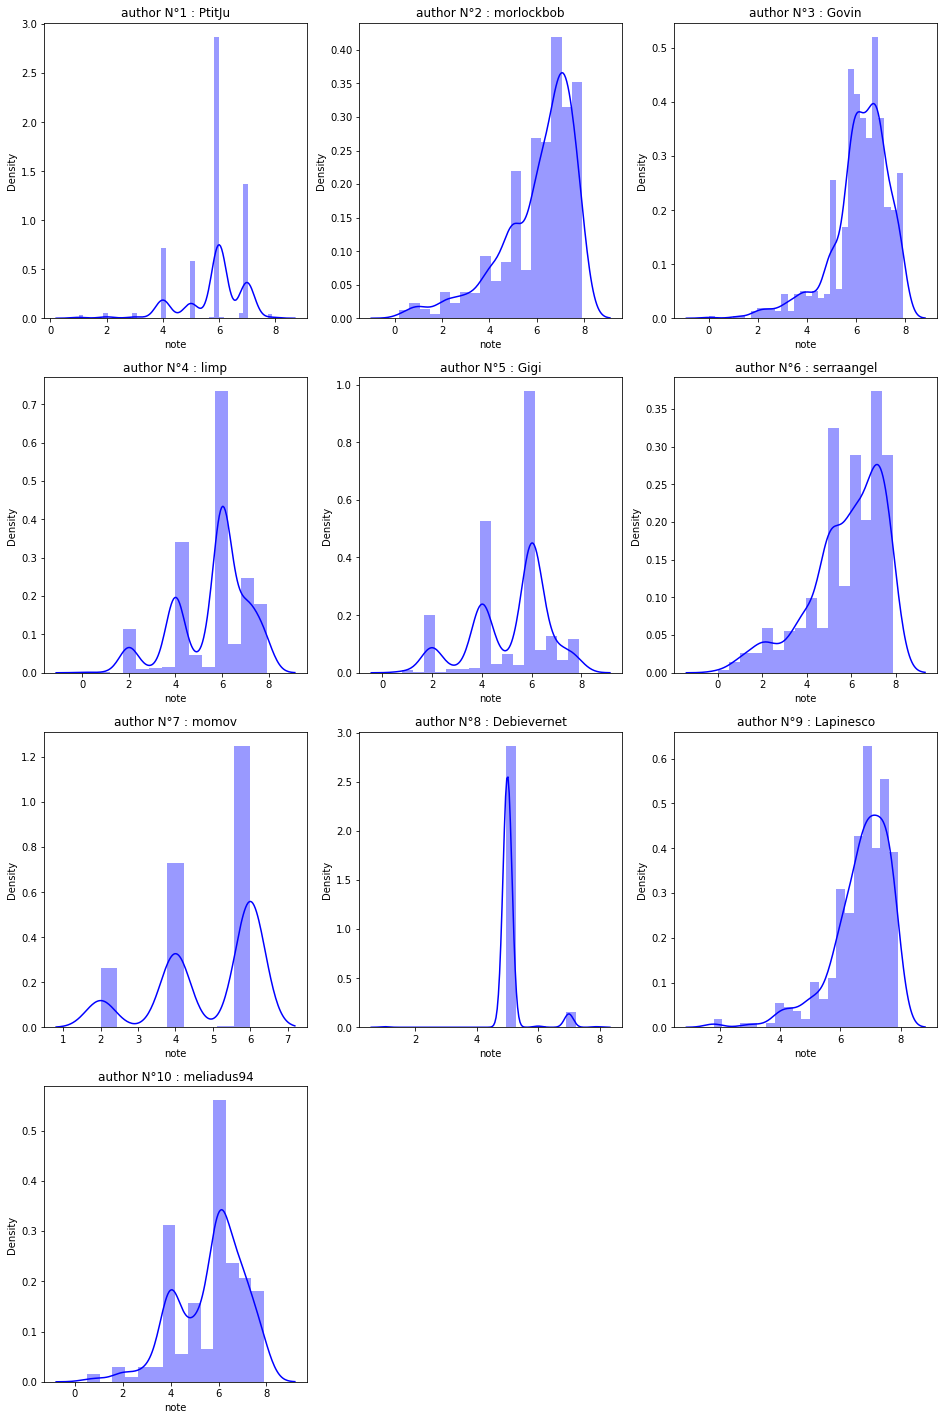

In [26]:
plt.figure(figsize=(16, 25))

i = 1
for aut in top_neg_auth:
    notes = df_neg[df_neg["author"] == aut]["note"]        
    plt.subplot(4, 3, i)
    sns.distplot(notes, color="blue").set(title=f"author N°{i} : {aut}")
    i += 1

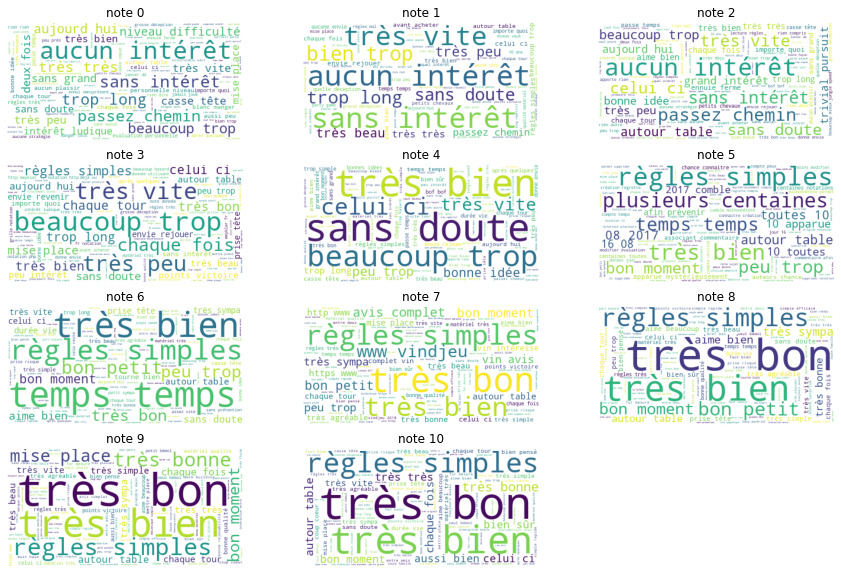

In [29]:
sw = stopwords.words('french') + \
    ["jeu", "être", "avoir", "plus", "tout", "cartes", 
     "joueurs", "partie", "parties", "ça", "si", "faire", 
     "fait", "vraiment", "jouer", "comme", "peut", 
     "ce", "cette", "quand", "car", "jeux", "donc", 
     "autres", "encore", "alors", "là", "dés", "ou", 
     "où", "carte", "tous", "joueur", "chose", "tric", "trac"] 

comments_df = df_avis_up[df_avis_up["comment"].notna()]

notes_int = comments_df["note"] // 1

words_notes = {}

for note in range(11):
    words_notes[note] = np.array(comments_df[notes_int == note]["comment"])
    
plt.figure(figsize=(15, 10))

for note in words_notes:
    wordcloud = visual.get_wordcloud(words_notes[note], sw) 
    plt.subplot(4, 3, note + 1)
    plt.title(f"note {note}")
    plt.imshow(wordcloud)
    plt.axis('off')